# Model Statistics

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading

In [6]:
df_records = pd.read_csv(
    "../logs/20240930-174503.csv",
    index_col=0,
)

df_records.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   epoch_time_seconds  8 non-null      float64
 1   train_avg_loss      8 non-null      float64
 2   eval_avg_loss       8 non-null      float64
 3   eval_accuracy       8 non-null      float64
dtypes: float64(4)
memory usage: 320.0 bytes


## Epoch Time

Epoch(s):                   8
Total:     0 hr  2 min 35 sec
Average:   0 hr  0 min 19 sec
StdDev:    0 hr  0 min 19 sec


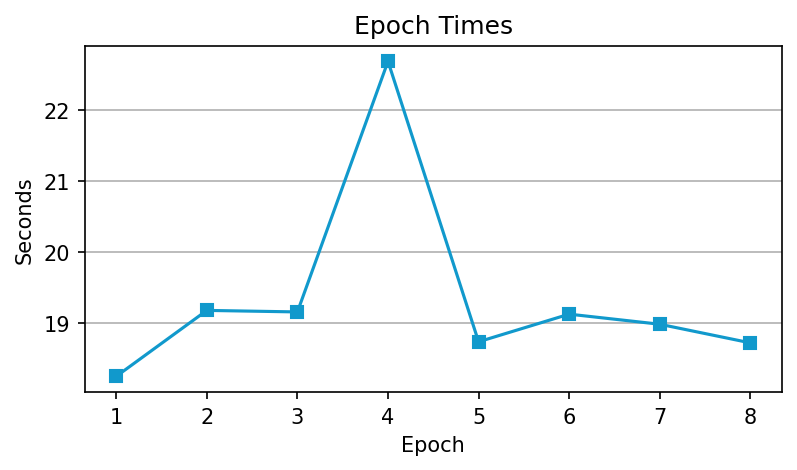

In [7]:
train_times_in_seconds = df_records["epoch_time_seconds"]
total_train_times_in_seconds = train_times_in_seconds.sum()
mean_train_times_in_seconds = train_times_in_seconds.mean()
std_train_times_in_seconds = train_times_in_seconds.std()
print("Epoch(s):%20d" % len(df_records))
print(
    "Total:   %3.0f hr %2.0f min %2.0f sec"
    % (
        total_train_times_in_seconds // 3600,
        total_train_times_in_seconds // 60,
        total_train_times_in_seconds % 60,
    )
)
print(
    "Average: %3.0f hr %2.0f min %2.0f sec"
    % (
        mean_train_times_in_seconds // 3600,
        mean_train_times_in_seconds // 60,
        mean_train_times_in_seconds % 60,
    )
)
print(
    "StdDev:  %3.0f hr %2.0f min %2.0f sec"
    % (
        mean_train_times_in_seconds // 3600,
        mean_train_times_in_seconds // 60,
        mean_train_times_in_seconds % 60,
    )
)

fig = plt.figure(figsize=(6, 3), dpi=150)
fig.set_facecolor("#fff")
ax = fig.add_subplot()
x_plot = df_records.index.to_numpy() + 1
ax.plot(
    x_plot,
    train_times_in_seconds,
    "s-",
    color="#19c",
)
ax.set(
    title="Epoch Times",
    xlabel="Epoch",
    ylabel="Seconds",
)
ax.grid(axis="y")

## Accuracy & Loss

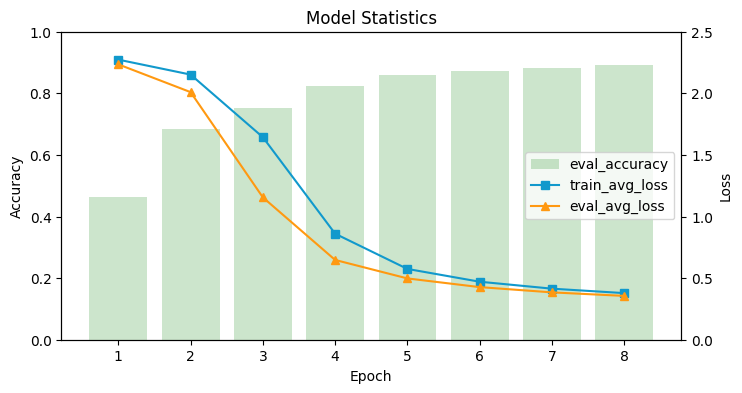

In [8]:
fig = plt.figure(figsize=(8, 4), dpi=100)
fig.set_facecolor("#fff")
ax_acc = fig.add_subplot()
ax_loss = ax_acc.twinx()

x = df_records.index.to_numpy() + 1

ax_loss.legend(
    handles=[
        ax_acc.bar(
            x,
            df_records["eval_accuracy"],
            color="green",
            alpha=0.2,
            label="eval_accuracy",
        ),
        *ax_loss.plot(
            x,
            df_records["train_avg_loss"],
            "s-",
            color="#19c",
            label="train_avg_loss",
        ),
        *ax_loss.plot(
            x,
            df_records["eval_avg_loss"],
            "^-",
            color="#f91",
            label="eval_avg_loss",
        ),
    ],
    loc="center right",
)

ax_acc.set(
    ylabel="Accuracy",
    title="Model Statistics",
    xlabel="Epoch",
    ylim=(0, 1),
)
ax_loss.set(
    ylabel="Loss",
    ylim=(0, 2.5),
)